In [1]:
 from IPython.display import SVG, display
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#encode some text as uncode
text = u"I'm executing this code on an Apple Computer."

#instantiate a language model
#to download language model: python -m spacy.en.download 
nlp = spacy.load('en') # or spacy.en.English()

#create a document
document = nlp(text)

In [3]:
for function in nlp.pipeline:
    print(function)

('tagger', <spacy.pipeline.Tagger object at 0x7ff2554c1d30>)
('parser', <spacy.pipeline.DependencyParser object at 0x7ff2535c5258>)
('ner', <spacy.pipeline.EntityRecognizer object at 0x7ff2535c5308>)


In [4]:
### Modifying the Language Model
def identify_starwars(doc):
    for token in doc:
        if token.text == u'starwars':
            token.tag_ = u'NNP'

def return_pipeline(nlp):
    return [nlp.tagger, nlp.parser, nlp.matcher, nlp.entity, identify_starwars]

text = u"I loved all of the starwars movies"
custom_nlp = spacy.load('en', create_pipeline=return_pipeline)
new_document = custom_nlp(text)

for function in custom_nlp.pipeline:
    print (function)

('tagger', <spacy.pipeline.Tagger object at 0x7ff2520d3978>)
('parser', <spacy.pipeline.DependencyParser object at 0x7ff252181d00>)
('ner', <spacy.pipeline.EntityRecognizer object at 0x7ff252181fc0>)


## Accessing Tokens and Spans

In [5]:
import pandas as pd
def info(obj):
    return {'type':type(obj),'__str__': str(obj)}


text = u"""spaCy excels at large-scale information extraction tasks. 
It's written from the ground up in carefully memory-managed Cython. """
document = nlp(text)
token = document[0]
span = document[0:3]


pd.DataFrame(list(map(info, [token,span,document])))

,__str__,type
0,spaCy,<class 'spacy.tokens.token.Token'>
1,spaCy excels at,<class 'spacy.tokens.span.Span'>
2,spaCy excels at large-scale information extrac...,<class 'spacy.tokens.doc.Doc'>


## Sentence boundary detection

In [6]:
print(document.sents)

In [7]:
for sent in document.sents:
    print(sent)

spaCy excels at large-scale information extraction tasks. 

It's written from the ground up in carefully memory-managed Cython.


## Tokenization

In [8]:
for token in document:
    print(token)

spaCy
excels
at
large
-
scale
information
extraction
tasks
.


It
's
written
from
the
ground
up
in
carefully
memory
-
managed
Cython
.


# morphological decompostion

In [9]:
 token = document[13]
print ("text: %s" % token.text)
print( "suffix: %s" % token.suffix_ )
print ("lemma: %s" % token.lemma_)

text: written
suffix: ten
lemma: write


## part of speach tagging

In [10]:
#Part of speech and Dependency tagging
attrs = map(lambda token: {
                     "token":token
                   , "part of speech":token.pos_
                   , "Dependency" : token.dep_}
                    , document)
pd.DataFrame(list(attrs))

,Dependency,part of speech,token
0,nsubj,ADJ,spaCy
1,ROOT,NOUN,excels
2,prep,ADP,at
3,amod,ADJ,large
4,punct,PUNCT,-
5,compound,NOUN,scale
6,compound,NOUN,information
7,compound,NOUN,extraction
8,pobj,NOUN,tasks
9,punct,PUNCT,.


## Noun Chunking

In [11]:
print('noun chunks: {}'.format(list(document.noun_chunks)))

noun chunks: [spaCy excels, large-scale information extraction tasks, It, the ground, carefully memory-managed Cython]


## Named entity recognition

In [12]:
ents = [(ent, ent.root.ent_type_) for ent in document.ents]
print ("entities: {}".format(ents))

entities: [(
, 'GPE'), (Cython, 'ORG')]


## Text similarity (using word vectors)

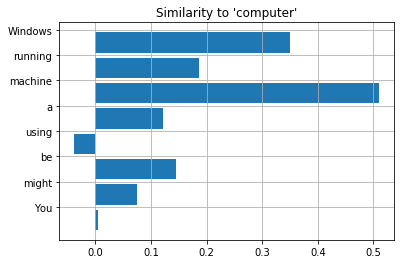

In [13]:
 #document, span, and token similarity
def plot_similarities(similarities, target):
    import matplotlib.pyplot as plt
    %matplotlib inline
    f, ax = plt.subplots(1)
    index = range(len(similarities))
    ax.barh(index, similarities)
    ax.set_yticks([i + .5 for i in index])
    ax.set_yticklabels(document2)
    ax.grid()
    ax.set_title("Similarity to '{}'".format(target))
    plt.show()
    
    
computer = nlp(u'computer')
document2 = nlp(u'You might be using a machine running Windows')
similarities = list(map(lambda token: token.similarity(computer),document2))
plot_similarities(similarities, computer)